Step1:
  - Load Data
     

Step2:
  - Problem identification (Regression / Classification)

Step3:
  - Cleaning Data
  
  - Find Target Value

Step4:
  - Perform EDA  

Step5:
  - Apply ML

  - Split the data into trainning data and Testing data

Step6:
  - Select Model / Algorithm

Step7:
  - Train the Model / Fit the Model

Step8:
  - Evaluate the models performance on training data

Step9:
  - Evaluate on testing data

Step10:
  - Evaluate the model performance on trainning data

Step11:
  - Select the best performance metrics

Step12:
  - Summary              


*DATA EXPLORATION*

In [1]:
#loading need libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
import pandas as pd
df = pd.read_csv('/content/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [52]:
df.shape

(1338, 7)

*MISSING VALUE*

In [9]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [10]:
#isnull = df.isnull().sum()\len(train)*100 this for in percentage
isnull = df.isnull().sum()
isnull = isnull[isnull > 0]
isnull.sort_values(inplace=True, ascending=False)
isnull

,0


In [11]:
# Categorical columns with null values
cat_nulls = df.select_dtypes(include="object").isnull().sum()
cat_nulls = cat_nulls[cat_nulls > 0]
print(cat_nulls)


Series([], dtype: int64)


In [14]:
df['charges'].value_counts()


,count
charges,
1639.56310,2
2221.56445,1
19798.05455,1
13063.88300,1
13555.00490,1
...,...
1149.39590,1
37079.37200,1
4738.26820,1


In [15]:
df.duplicated().sum()

np.int64(1)

*INCONSISTENCY*

*NUMERICAL DATA TYPE*

In [16]:
int_col = df.select_dtypes(include=["int64"]).columns.tolist()
df[int_col]

,age,children
0,19,0
1,18,1
2,28,3
3,33,0
4,32,0
...,...,...
1333,50,3
1334,18,0
1335,18,0
1336,21,0


In [17]:
float_col = df.select_dtypes(include=["float64"]).columns.tolist()
float_col

['bmi', 'charges']

In [18]:
df[float_col].head(50)

,bmi,charges
0,27.900,16884.92400
1,33.770,1725.55230
2,33.000,4449.46200
3,22.705,21984.47061
4,28.880,3866.85520
5,25.740,3756.62160
6,33.440,8240.58960
7,27.740,7281.50560
8,29.830,6406.41070
9,25.840,28923.13692


In [19]:
cat_col = df.select_dtypes(include=["object"]).columns.tolist()
df[cat_col]

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


*DISTRIBUTION TARGET VALUE*

<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-2317777932.py:9: SyntaxWarning: invalid escape sequence '\m'
  plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
/tmp/ipython-input-2317777932.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'], fit=stats.norm)


Text(0, 0.5, 'Frequency')

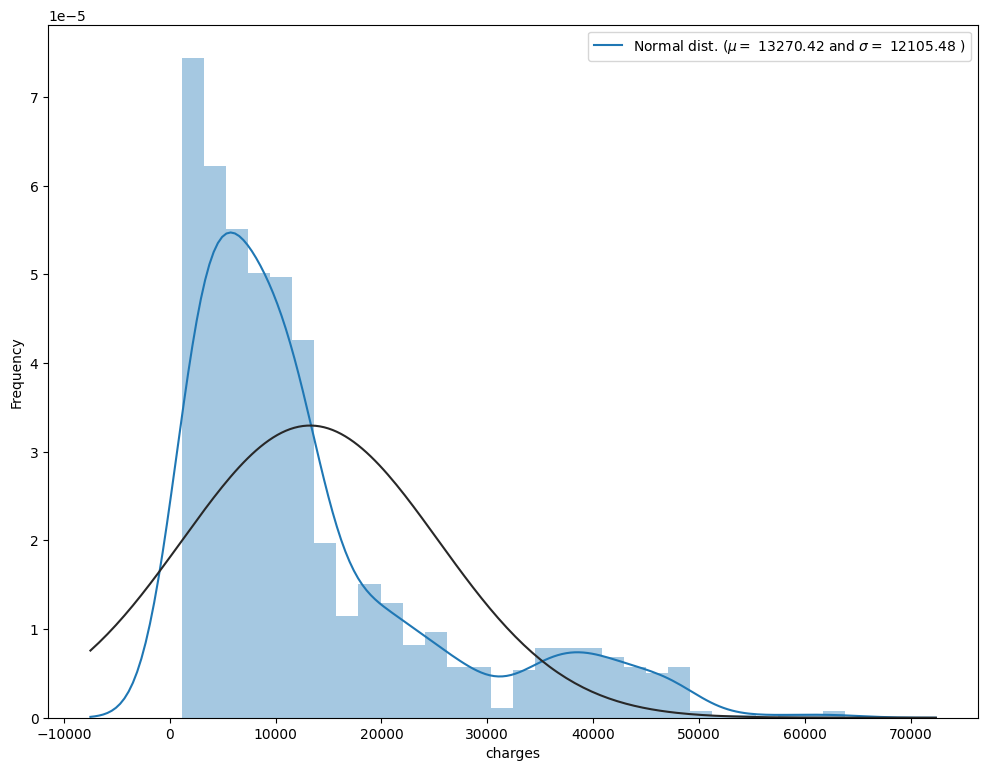

In [22]:
from scipy import stats

plt.subplots(figsize=(12,9))
sns.distplot(df['charges'], fit=stats.norm)

(mu, sigma) = stats.norm.fit(df['charges'])

# plot with the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

In [23]:
df['charges']

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-1587382456.py:12: SyntaxWarning: invalid escape sequence '\m'
  plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
/tmp/ipython-input-1587382456.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'], fit=stats.norm)


Text(0, 0.5, 'Frequency')

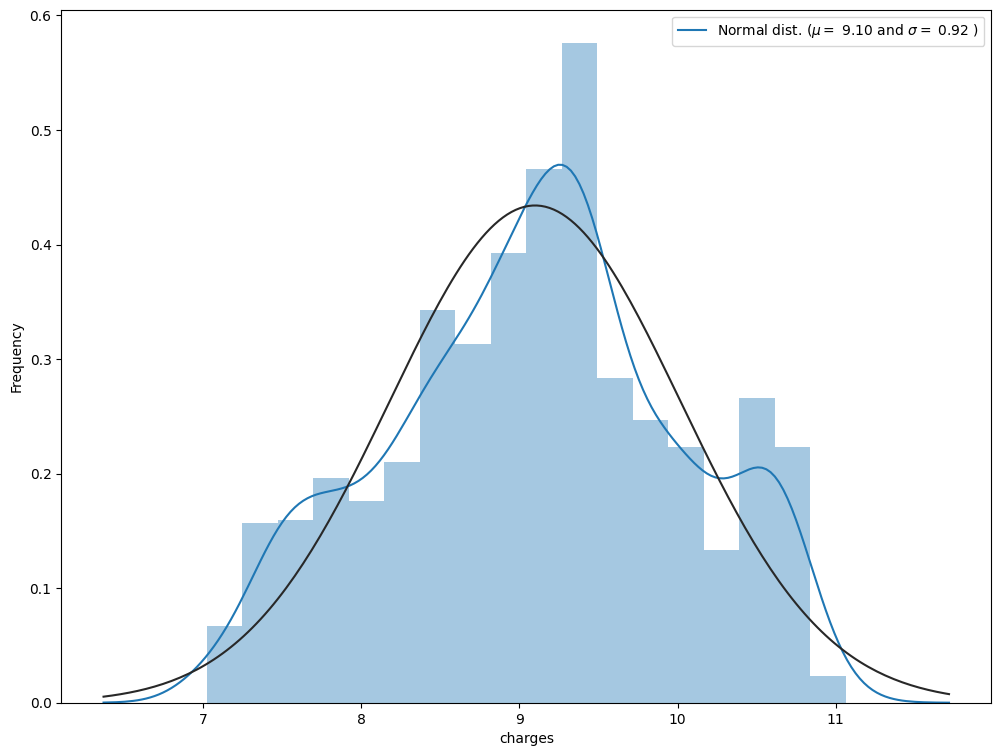

In [24]:
#we use log function which is in numpy
df['charges'] = np.log1p(df['charges'])

#Check again for more normal distribution
plt.subplots(figsize=(12,9))
sns.distplot(df['charges'], fit=stats.norm)

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(df['charges'])

# plot with the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

In [25]:
df['charges']

,charges
0,9.734236
1,7.453882
2,8.400763
3,9.998137
4,8.260455
...,...
1333,9.268755
1334,7.699381
1335,7.396847
1336,7.605365


*EDA*

In [26]:
df['charges'].describe()

,charges
count,1338.000000
mean,9.098828
std,0.919379
min,7.023647
25%,8.464064
50%,9.146658
75%,9.719618
max,11.063061


In [27]:
df["charges"].value_counts()

,count
charges,
7.402795,2
7.706417,1
9.893389,1
9.477683,1
9.514585,1
...,...
7.047861,1
10.520843,1
8.463638,1


In [28]:
df["charges"].value_counts(normalize = True)


,proportion
charges,
7.402795,0.001495
7.706417,0.000747
9.893389,0.000747
9.477683,0.000747
9.514585,0.000747
...,...
7.047861,0.000747
10.520843,0.000747
8.463638,0.000747


*LABEL ENCODER*

In [29]:
from sklearn.preprocessing import LabelEncoder


# Encoder object
le = LabelEncoder()

# Har object column par encoder apply karna
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])   # encoding apply

# Encode hone ke baad check karlo
print(df.dtypes)
print(df.head())

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object
   age  sex     bmi  children  smoker  region   charges
0   19    0  27.900         0       1       3  9.734236
1   18    1  33.770         1       0       2  7.453882
2   28    1  33.000         3       0       2  8.400763
3   33    1  22.705         0       0       1  9.998137
4   32    1  28.880         0       0       1  8.260455


*CO RELATION*

In [51]:
corr = df.corr()
plt.subplots(figsize=(100,100))
sns.heatmap(corr, annot=True)

<Axes: >

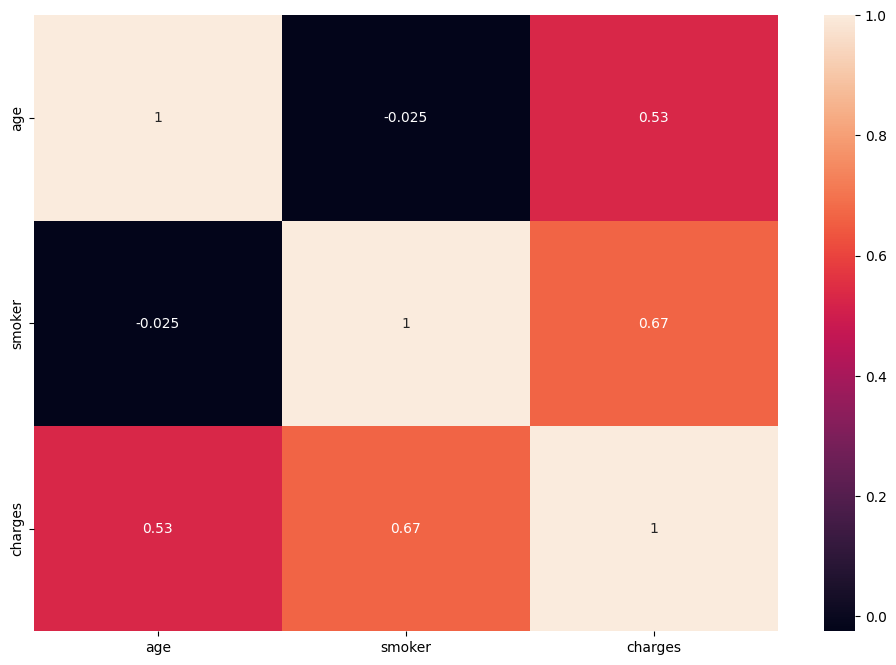

In [31]:
thres = (corr['charges'] > 0.5) | (corr['charges'] < -0.5)
top_feature = corr.index[abs(thres)]

plt.subplots(figsize=(12, 8))
top_corr = df[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [33]:
print("Find most important features relative to target")
corr = corr.corr()
corr.sort_values(['charges'], ascending=False, inplace=True)
corr.charges

Find most important features relative to target


,charges
charges,1.000000
smoker,0.841576
age,0.684033
children,-0.100557
bmi,-0.408192
sex,-0.475485
region,-0.716517


*PREPARING THE DATA FOR MODELING*

In [35]:
y = df['charges'].values
x = df.drop(['charges'], axis=1).values


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [37]:
X_test

array([[24.   ,  1.   , 23.4  ,  0.   ,  0.   ,  3.   ],
       [28.   ,  0.   , 33.4  ,  0.   ,  0.   ,  3.   ],
       [49.   ,  1.   , 30.3  ,  0.   ,  0.   ,  3.   ],
       ...,
       [57.   ,  0.   , 25.74 ,  2.   ,  0.   ,  2.   ],
       [47.   ,  1.   , 28.215,  4.   ,  0.   ,  0.   ],
       [25.   ,  1.   , 30.59 ,  0.   ,  0.   ,  0.   ]])

In [38]:
y_test

array([ 7.58610045,  8.06243846,  9.00179968, 10.49981537,  9.34467353,
        9.58691829,  9.07866429,  9.71587881,  7.66664408,  8.73189287,
        9.31237119,  7.80820931,  8.88154001,  9.66896612,  7.6583875 ,
        7.5398177 ,  8.9037032 , 10.7419489 ,  9.45267204,  9.85030679,
        8.56928563,  9.57467496,  8.52300559, 10.73888295,  8.86092775,
        7.74209816,  9.6890412 , 10.76843224,  8.87428882,  9.01336398,
        9.94653672, 10.28643377,  7.55347445, 10.67487778,  8.62789445,
       10.09336108,  8.63953736,  8.27796596,  7.75470408, 10.27994808,
        9.1361083 ,  8.87538099, 10.21745505,  9.3069871 , 10.6484089 ,
        8.26045542,  9.83984865,  9.41220629,  7.59360253,  8.74408606,
        7.9047452 ,  7.87855045,  9.46947774,  7.40279482,  8.09586347,
       10.61451274,  7.95733052,  9.65221383,  9.64983197,  9.38698964,
        8.49850152,  9.43545037,  9.30414954, 10.68960983, 10.6685939 ,
        9.1714605 , 10.42625222, 10.63735917, 10.23010023,  9.37

*MODELS*

* Linear Regression Model: Performance Evaluation and Prediction

In [39]:
# y = mx+b
from sklearn.linear_model import LinearRegression

model = LinearRegression()
#Model training
model.fit(X_train, y_train)
#Model performance evaluation
print("Accuracy --> ", model.score(X_test, y_test)*100)

#Prediction
print("Predict value " + str(model.predict([X_test[75]])))
print("Real value " + str(y_test[75]))

Accuracy -->  75.31562883454794
Predict value [8.41548279]
Real value 8.352529056727912


In [40]:
#Score/Accuracy
print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  75.31562883454794


In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test)

# Regression Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error :", mae)
print("Mean Squared Error :", mse)
print("Root Mean Squared Error :", rmse)
print("R-squared :", r2)

Mean Absolute Error : 0.27327548072934993
Mean Squared Error : 0.20800495414275844
Root Mean Squared Error : 0.45607560134560854
R-squared : 0.7531562883454794




*   RANDOM FOREST REGRESSOR















In [42]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100)
#Fit
rfr.fit(X_train, y_train)

#Prediction
print("Predict value " + str(rfr.predict([X_test[142]])))
print("Real value " + str(y_test[142]))

#Score/Accuracy
print("Accuracy --> ", rfr.score(X_test, y_test)*100)

Predict value [9.1139988]
Real value 9.062830719960754
Accuracy -->  76.59575985944181


In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = rfr.predict(X_test)

# Regression Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error :", mae)
print("Mean Squared Error :", mse)
print("Root Mean Squared Error :", rmse)
print("R-squared :", r2)

Mean Absolute Error : 0.22068438175321836
Mean Squared Error : 0.19721782112871417
Root Mean Squared Error : 0.44409213135194614
R-squared : 0.7659575985944181


*GRADING BOOSTING REGRESSOR*

In [44]:
#Train the model
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)
#Fit
GBR.fit(X_train, y_train)
#Prediction
print("Predict value " + str(model.predict([X_test[142]])))
print("Real value " + str(y_test[142]))
print("Accuracy --> ", GBR.score(X_test, y_test)*100)



Predict value [8.94215888]
Real value 9.062830719960754
Accuracy -->  77.72094240493882


In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = GBR.predict(X_test)

# Regression Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error :", mae)
print("Mean Squared Error :", mse)
print("Root Mean Squared Error :", rmse)
print("R-squared :", r2)

Mean Absolute Error : 0.21472400934703714
Mean Squared Error : 0.1877363746616514
Root Mean Squared Error : 0.4332855578733861
R-squared : 0.7772094240493883


*SUPPORT VECTOR REGRESSOR*

In [46]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)


#Prediction
print("Predict value " + str(svr.predict([X_test[142]])))
print("Real value " + str(y_test[142]))
print("Accuracy --> ", svr.score(X_test, y_test)*100)


Predict value [9.16276328]
Real value 9.062830719960754
Accuracy -->  26.523875070269977


In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#linear regression
y_pred = svr.predict(X_test)

# Regression Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error :",mae)
print("Mean Squared Error :",mse)
print("Root Mean Squared Error :",rmse)
print("R-squared :",r2)

Mean Absolute Error : 0.45423451716426727
Mean Squared Error : 0.6191528191727461
Root Mean Squared Error : 0.7868626431422108
R-squared : 0.26523875070269975


*DECISION TREE REGRESSOR*

In [48]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)


#Prediction
print("Predict value " + str(dtr.predict([X_test[142]])))
print("Real value " + str(y_test[142]))
print("Accuracy --> ", dtr.score(X_test, y_test)*100)


Predict value [9.03944164]
Real value 9.062830719960754
Accuracy -->  49.62720975032743


In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#linear regression
y_pred = dtr.predict(X_test)

# Regression Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error :",mae)
print("Mean Squared Error :",mse)
print("Root Mean Squared Error :",rmse)
print("R-squared :",r2)

Mean Absolute Error : 0.3309786876713885
Mean Squared Error : 0.42447060351249793
Root Mean Squared Error : 0.6515140854290856
R-squared : 0.4962720975032743


Project Summary: Medical Insurance Cost Prediction

Summary statistics for numerical columns (age, bmi, children, charges) include count, unique values, top (most frequent) value, and frequency of the top value.
Unique counts for categorical columns:
sex: 2 unique values
smoker: 2 unique values
region: 4 unique values
There are no null values in any columns.
The target variable is "charges."
The features consist of 6 columns (age, sex, bmi, children, smoker, region).
The dataset has 1338 rows.    

firstly i explore the data in few main steps like import all the important libraries Loaded essential Python libraries such as pandas, numpy, matplotlib, and seaborn for data manipulation and visualization.
Used scipy.stats for statistical analysis, train_test_split from sklearn.model_selection to divide the dataset into training and testing sets, and LabelEncoder from sklearn.preprocessing to convert categorical variables into numeric format for modeling.
 after data cleaning we did eda.
 and after that we used distribution target value code and n this section of code is used to analyze and normalize the distribution of the target variable charges.
Initially, a distribution plot (distplot) is drawn to visualize how the insurance charges are spread. Since the data is right-skewed (contains high-value outliers), the logarithmic transformation np.log1p(df['charges']) is applied to make the distribution more symmetrical and closer to a normal distribution.



1. Data Encoding

Categorical columns such as sex, smoker, and region were converted into numerical format using Label Encoding.
This step ensured that the categorical variables could be understood and processed by machine learning algorithms.
After encoding, the data types and the first few rows were printed to verify the changes.

2. Data Correlation Analysis

To identify relationships between features, the correlation matrix was computed using df.corr().
A heatmap (via Seaborn) was then plotted to visualize how each feature relates to the target variable, charges.
Bright colors in the heatmap indicate a strong correlation, while dark colors represent a weak or negative correlation.

This helped highlight that smoking status, age, and BMI have the strongest relationship with medical charges.

3. Data Splitting

The dataset was divided into:

Target variable (y): charges

Feature variables (X): age, sex, bmi, children, smoker, and region

Using train_test_split(), the data was split into 80% training and 20% testing sets to ensure a fair evaluation of model performance.

4. Random Forest Regressor

Model: RandomForestRegressor(n_estimators=100)

The model was trained on the training data (X_train, y_train) and predictions were made on the test set.

Performance Metrics:

Mean Absolute Error (MAE): 0.22

Mean Squared Error (MSE): 0.19

Root Mean Squared Error (RMSE): 0.44

R² Score: 0.76

Model Accuracy: Approximately 76.6%

The Random Forest model performed well, capturing non-linear patterns effectively.

5. Gradient Boosting Regressor

Model: GradientBoostingRegressor(n_estimators=100, max_depth=4)

This model showed slightly better performance compared to the Random Forest:

Performance Metrics:

MAE: 0.21

MSE: 0.18

RMSE: 0.43

R² Score: 0.77

Model Accuracy: Approximately 77.7%

The Gradient Boosting model improved prediction accuracy by efficiently minimizing residual errors.

8. Conclusion

The Gradient Boosting Regressor delivered the best performance, achieving the highest R² score of 0.77, making it the most reliable model for predicting medical insurance costs.

Key influential factors identified were:

Smoking status (strongest predictor)

Age

Body Mass Index (BMI)

For future improvement, performance could be enhanced through:

Hyperparameter tuning (Grid Search or Random Search)

Feature scaling and normalization

Cross-validation to reduce overfitting and improve generalization.

